In [1]:
import warnings

warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime

# Modelling Algorithms :

# Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.model_selection import train_test_split

# preprocessing :
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualisation
import seaborn as sns
import missingno as msno

# importing the dataset
df = pd.read_csv("diamonds.csv")


In [2]:
# visualising the dataset
print(df.head(10))

   Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1           2   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2           3   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3           4   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4           5   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75   
5           6   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48   
6           7   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47   
7           8   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53   
8           9   0.22       Fair     E     VS2   65.1   61.0  3.87  3.78  2.49   
9          10   0.23  Very Good     H     VS1   59.4   61.0  4.00  4.05  2.39   

   price  
0    326  
1    326  
2    327  
3    334  
4    335  
5    336  
6    336  
7    337  
8    337 

In [3]:
# remove the unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# checking to see if it's removed
print(df.head())
# Checking to see if there are any missing values
print(df.isnull().sum())

   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


              carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  


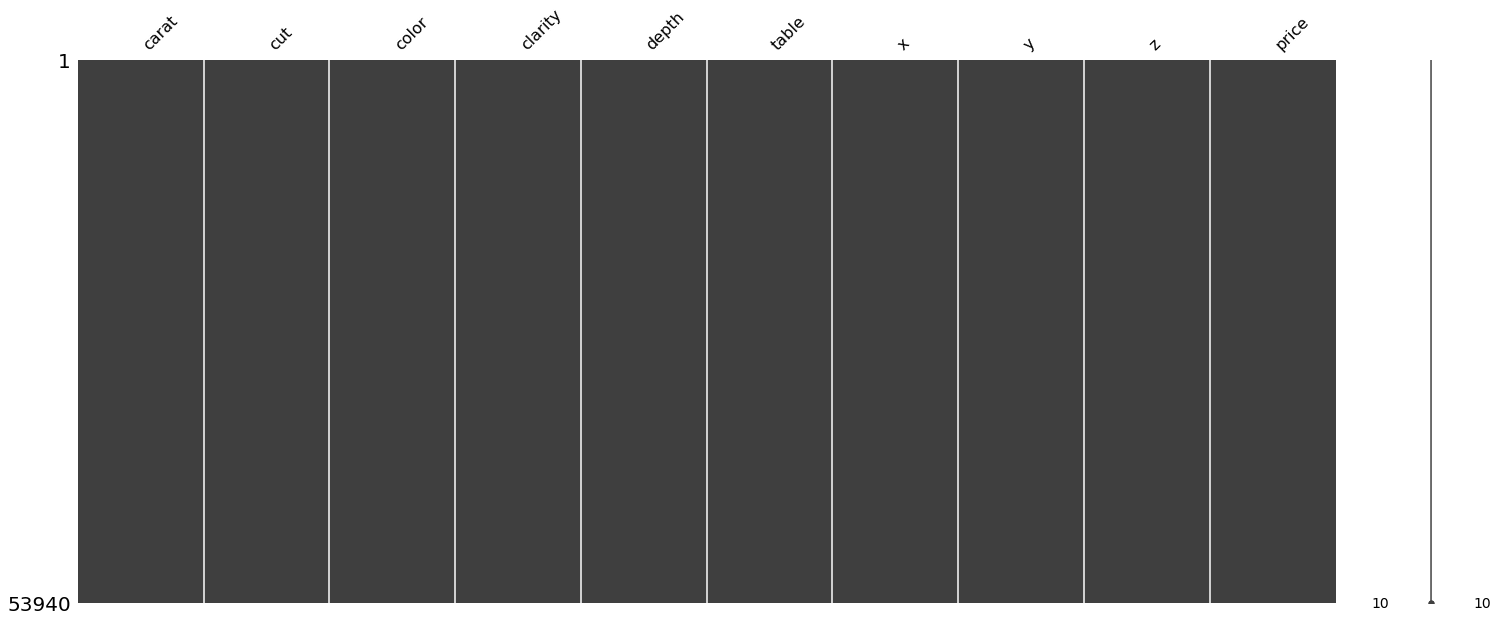

In [4]:

# visualizig that there are no missing values
msno.matrix(df)

# here we can see for some of the x, y and z values we have 0 which makes no sense
# looking at them

print(df.describe())

In [5]:
# Check whether x, y, z column containing the missing value
print(df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])
print(len(df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]))

       carat        cut color clarity  depth  table     x     y    z  price
2207    1.00    Premium     G     SI2   59.1   59.0  6.55  6.48  0.0   3142
2314    1.01    Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
4791    1.10    Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
5471    1.01    Premium     F     SI2   59.2   58.0  6.50  6.47  0.0   3837
10167   1.50       Good     G      I1   64.0   61.0  7.15  7.04  0.0   4731
11182   1.07      Ideal     F     SI2   61.6   56.0  0.00  6.62  0.0   4954
11963   1.00  Very Good     H     VS2   63.3   53.0  0.00  0.00  0.0   5139
13601   1.15      Ideal     G     VS2   59.2   56.0  6.88  6.83  0.0   5564
15951   1.14       Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
24394   2.18    Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
24520   1.56      Ideal     G     VS2   62.2   54.0  0.00  0.00  0.0  12800
26123   2.25    Premium     I     SI1   61.3   58.0  8.52  8.42  0.0  15397
26243   1.20

In [6]:
#drop value which is missing =0  if x , y, z  are equal zero , it`s doesn`t make sense
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

# Changed Categorical Value to Numerical
df['cut'].replace('Ideal', 100, inplace=True)
df['cut'].replace('Premium', 90, inplace=True)
df['cut'].replace('Very Good', 80, inplace=True)
df['cut'].replace('Good', 70, inplace=True)
df['cut'].replace('Fair', 60, inplace=True)
df['color'].replace('D', 100, inplace=True)
df['color'].replace('E', 90, inplace=True)
df['color'].replace('F', 80, inplace=True)
df['color'].replace('G', 70, inplace=True)
df['color'].replace('H', 60, inplace=True)
df['color'].replace('I', 50, inplace=True)
df['color'].replace('J', 40, inplace=True)
df['clarity'].replace('IF', 100, inplace=True)  # Internally Flawless
df['clarity'].replace('VVS1', 90, inplace=True)  # Very Very Slightly Included - level 1
df['clarity'].replace('VVS2', 80, inplace=True)  # Very Very Slightly Included - level 2
df['clarity'].replace('VS1', 70, inplace=True)  # Very Slightly Included - level 1
df['clarity'].replace('VS2', 60, inplace=True)  # Very Slightly Included - level 2
df['clarity'].replace('SI1', 50, inplace=True)  # Slightly Included - level 1
df['clarity'].replace('SI2', 40, inplace=True)  # Slightly Included - level 2
df['clarity'].replace('I1', 30, inplace=True)  # Included - level 1

print(df)

       carat  cut  color  clarity  depth  table     x     y     z  price
0       0.23  100     90       40   61.5   55.0  3.95  3.98  2.43    326
1       0.21   90     90       50   59.8   61.0  3.89  3.84  2.31    326
2       0.23   70     90       70   56.9   65.0  4.05  4.07  2.31    327
3       0.29   90     50       60   62.4   58.0  4.20  4.23  2.63    334
4       0.31   70     40       40   63.3   58.0  4.34  4.35  2.75    335
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
53935   0.72  100    100       50   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72   70    100       50   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70   80    100       50   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86   90     60       40   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75  100    100       40   62.2   55.0  5.83  5.87  3.64   2757

[53920 rows x 10 columns]


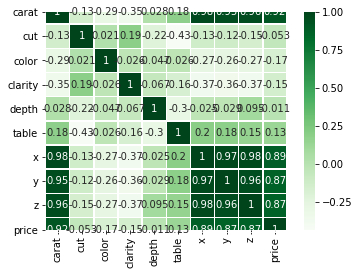

In [7]:
# looking at the correlation of the variables to price
corr = df.corr()

sns.heatmap(data=corr, square=True, annot=True, cbar=True, linewidths=0.5, cmap='Greens').figure.savefig('test11.png')

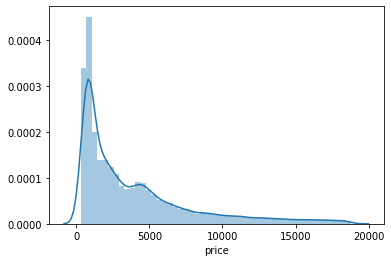

In [8]:
#plt.shows()
# looking to see if there is skew in the data
sns.distplot(df['price']).figure.savefig('test7.png')

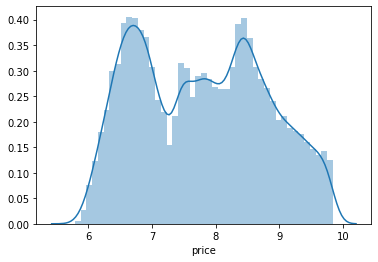

In [9]:
# log transform as there is a skew and not linear and need it for the algorithms
X = df.drop(['price'], axis=1)
y = np.log(df['price'])

# looking to see if there is still a skew
sns.distplot(y)
#sns.jointplot(x="x",y="price", data = df).savefig('test4.png')

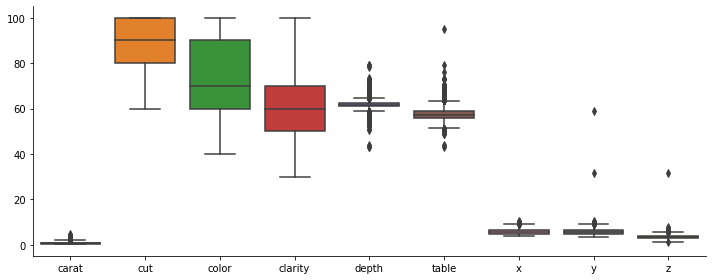

In [10]:
# looking at the range of all the variables
sns.factorplot(data=X, kind='box', size=4, aspect=2.5).savefig('test2.png')

names = X.columns

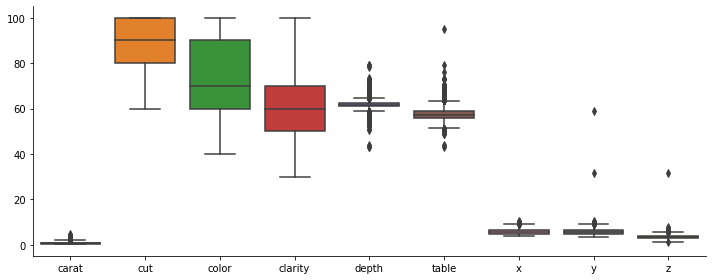

In [11]:
# looking at the range after scaling
sns.factorplot(data=X, kind='box', size=4, aspect=2.5).savefig('test1.png')

In [12]:
# splitting into train and test set
Trainset,Testset = train_test_split(df, test_size = 0.3, random_state = 309)

train_data_copy = Trainset.copy()
X_train = train_data_copy.drop(["price"], axis=1)
y_train = Trainset["price"]

test_data_copy = Testset.copy();
X_test = test_data_copy.drop(["price"], axis=1)
y_test = test_data_copy["price"]

#Standardize
Xs_train_set_mean = X_train.mean()
Xs_train_set_std  = X_train.std()
Xs_train_set      = (X_train - Xs_train_set_mean) / Xs_train_set_std
Xs_test_set       = (X_test  - Xs_train_set_mean) / Xs_train_set_std
import math
def showResult(regressor, label):
    start_time = datetime.datetime.now()
    #     regressor.fit(X_train, y_train)#Estimators
    regressor.fit(Xs_train_set, y_train)  # Estimators
    #     y_pred = regressor.predict(X_test)#predict after fit
    y_pred = regressor.predict(Xs_test_set)  # predict after fit
    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = math.pow(mean_squared_error(y_test, y_pred), 0.5)  # RMSE = mean_squared_error(y_test, y_pred)**0.5 #same
    R2 = r2_score(y_test, y_pred)

    print("--------------------------")
    print("Regressor: " + label)
    print(label + ' MSE    : %0.2f ' % MSE)
    print(label + ' RMSE   : %0.2f ' % RMSE)
    print(label + ' R2     : %0.2f ' % R2)
    print(label + ' MAE    : %0.2f ' % MAE)
    print("Learn: execution time={t:.3f} seconds".format(t=exection_time))
    print("--------------------------")

In [ ]:
showResult(LinearRegression(), "Linear Regression")
showResult(KNeighborsRegressor(), "KNN")
showResult(Ridge(), "Ridge Regression")  # alpha=0.01, normalize = True
showResult(DecisionTreeRegressor(), "Decision Tree")
showResult(RandomForestRegressor(), "Random Forest")  # max_depth = 5, random_state = 0, n_estimators = 100
showResult(GradientBoostingRegressor(), "Gradient Boosting")
showResult(SGDRegressor(), "SGD")
showResult(SVR(), "SVR")
showResult(LinearSVR(), "LinearSVR")
showResult(MLPRegressor(), "MLP")  # hidden_layer_sizes =(10,), max_iter = 1000

--------------------------
Regressor: Linear Regression
Linear Regression MSE    : 1435162.52 
Linear Regression RMSE   : 1197.98 
Linear Regression R2     : 0.91 
Linear Regression MAE    : 802.95 
Learn: execution time=0.035 seconds
--------------------------
--------------------------
Regressor: KNN
KNN MSE    : 528483.67 
KNN RMSE   : 726.97 
KNN R2     : 0.97 
KNN MAE    : 379.86 
Learn: execution time=0.676 seconds
--------------------------
--------------------------
Regressor: Ridge Regression
Ridge Regression MSE    : 1435315.58 
Ridge Regression RMSE   : 1198.05 
Ridge Regression R2     : 0.91 
Ridge Regression MAE    : 803.09 
Learn: execution time=0.014 seconds
--------------------------
--------------------------
Regressor: Decision Tree
Decision Tree MSE    : 557881.68 
Decision Tree RMSE   : 746.91 
Decision Tree R2     : 0.97 
Decision Tree MAE    : 362.86 
Learn: execution time=0.299 seconds
--------------------------
--------------------------
Regressor: Random Forest

In [ ]:
########################Tuning Paremeter#####################################
showResult(LinearRegression(fit_intercept= True), "Linear Regression")
showResult(KNeighborsRegressor(n_neighbors=11,weights='distance'), "KNN")
showResult(Ridge(alpha=0.01, normalize='distance'), "Ridge Regression")  # alpha=0.01, normalize = True
showResult(DecisionTreeRegressor(max_depth=9), "Decision Tree")
showResult(RandomForestRegressor(max_depth=9, random_state=0, n_estimators=700), "Random Forest")  # max_depth = 5, random_state = 0, n_estimators = 100
showResult(GradientBoostingRegressor(max_depth=5, n_estimators=1000,learning_rate=0.02, loss='ls'), "Gradient Boosting")
showResult(SGDRegressor(), "SGD")
showResult(SVR(C =500.0), "SVR")
showResult(LinearSVR(C=5.0,dual=True,loss='squared_epsilon_insensitive'), "LinearSVR")
showResult(MLPRegressor(learning_rate_init=0.2,solver='lbfgs',activation='relu'), "MLP")  # hidden_layer_sizes =(10,), max_iter = 1000